In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import manufacturing as mn

In [2]:
# raw1 = pd.read_excel('FFP_ASSY.xlsx', sheet_name='Raw Data',usecols=['ProcessType','JobNO','Result','ItemNameType','failitem','Item47','Item89','Item57','Item46'])

In [3]:
# raw1.to_excel('tweak_ApprochS70s_FFP_ASSY.xlsx',index=False)

In [12]:
raw = pd.read_excel('EP47_PR.xlsx', sheet_name='RawData')

In [5]:
plt.style.use('fivethirtyeight')

def

In [6]:
def tweak_df(df,itemnametype, item, lower):    
    return(df
    # .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}','JobNO']]
    .astype({'JobNO':'category'})
    .sort_values('JobNO', ascending=False)
    )

In [7]:
def my_hisplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.histplot(data = (df
    # .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}']])
    ,x=f'Item{item}'
    ,hue='Result'
    ,hue_order=[1,0]
    )
    )

In [8]:
def my_stripplot(df,itemnametype, item, lower, title):
    
    plt.figure(dpi=100)
    plt.title(title)
    
    return(sns.stripplot(data = (df
    # .assign(Vendor = (raw.JobNO.where(~raw.JobNO.isin(chitwig),'chitwig').where(~raw.JobNO.isin(sharpeye),'sharpeye')))
    .query(f"ItemNameType=={itemnametype} and failitem.isin([0,{item}]) and Item{item}>{lower}")
    [['ProcessType','Result',f'Item{item}','Vendor']])
    ,x='Vendor'
    ,y=f'Item{item}'
    ,hue='Result'
    ,hue_order=[1,0]
    ,dodge=True
    )
    )

In [9]:
def ppk_df(df,itemnametype, item):    
    return(df
    .query(f"ItemNameType=={itemnametype} and Result==True")
    [f'Item{item}']
    )

In [10]:
def ppk_result(df, upper, lower):
    return (
        mn.calc_pp(df, upper_specification_limit=upper, lower_specification_limit=lower),
        mn.calc_ppk(df, upper_specification_limit=upper, lower_specification_limit=lower),
        mn.suggest_specification_limits(df)
        )

# HT L5

sns

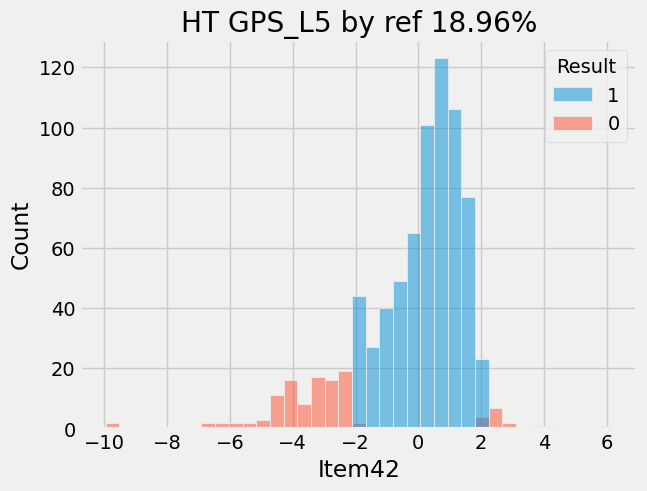

In [19]:
my_hisplot(raw,17801,42,-10, 'HT GPS_L5 by ref 18.96%');

1. SUS Slate gray bezel用到舊料 -00, -01分開後重測率低
2. Golden沒貼泡棉，DUT有貼泡棉，所以測試分布偏高
3. 遮光泡棉貼反會造成db極低 ~-10

ppk

In [18]:
tweak_df(raw,17801,42,-20).query("Result==True").describe()

,Item42
count,655.000000
mean,0.308824
std,1.041556
min,-2.000000
25%,-0.355000
50%,0.500000
75%,1.130000
max,1.990000


In [22]:
ppk_result(ppk_df(raw,17801,42), upper=2, lower=-2)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(0.6400682924627639,
 0.5412339304785136,
 (-3.5970087928788286, 4.214657647840661))

# FT1 L1+L5 by ref

sns

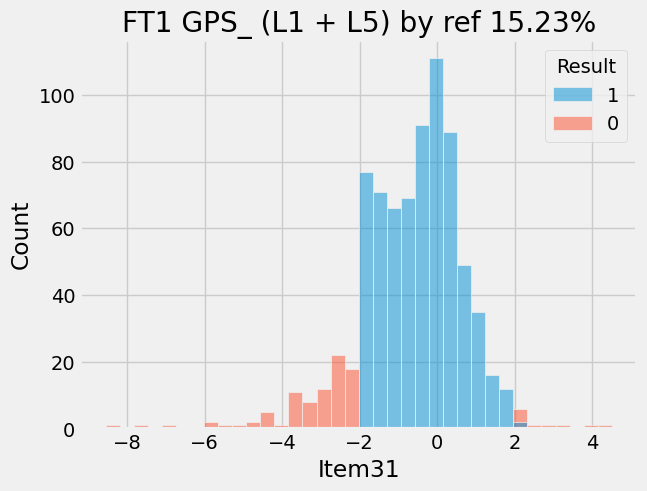

In [23]:
my_hisplot(raw,17802,31,-20, 'FT1 GPS_ (L1 + L5) by ref 15.23%');

雙峰
Glass SKU分布偏低>Glass SKU另外挑Golden
CT/HT/FT皆共用規格

ppk

In [26]:
ppk_result(ppk_df(raw,17802,31), upper=2, lower=-2)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(0.7140415833637277,
 0.5774654530324161,
 (-3.883740562557684, 3.1186527384680853))

# FT2 ANT

sns

<AxesSubplot: title={'center': 'FT2 ANT_power 2450MHz BY REF (ep47) 11.31%'}, xlabel='Item4', ylabel='Count'>

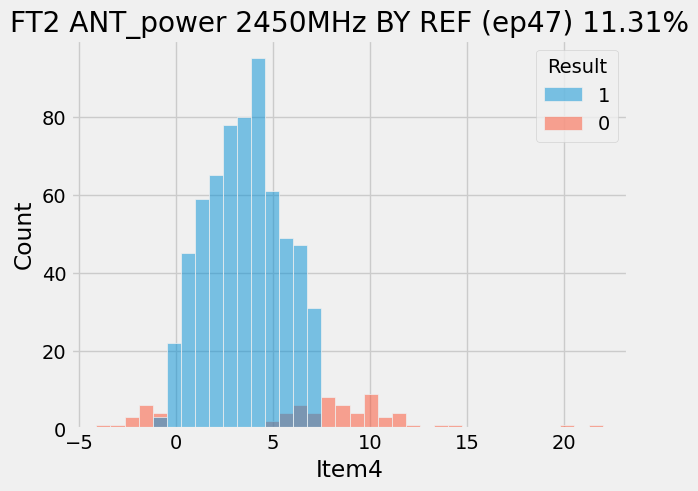

In [29]:
my_hisplot(raw,17803,4,-10, 'FT2 ANT_power 2450MHz BY REF (ep47) 11.31%')

1. 一開始Golden偏低，緊急從DUT中挑機台，但mean不理想
2. FT2測試治具間需要間隔10公分。會請PDO設計治具，預設間隔就是固定
3. 治具2.4G天線peeling

FT2電流分布有兩叢
FT2的IOP排序可能使機台的電流維持在一個狀態，不在預期內

ppk

In [33]:
tweak_df(raw,17803,4,-10).query("Result==True").describe()

,Item4
count,635.000000
mean,3.538268
std,1.920592
min,-0.800000
25%,2.050000
50%,3.600000
75%,5.000000
max,7.000000


In [35]:
ppk_result(ppk_df(raw,17803,4), upper=7, lower=-1)

shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
k^2 test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(0.6942302397507873,
 0.6008098082756617,
 (-3.663953842979008, 10.740489276049875))

# CT L1+L5 by ref

sns

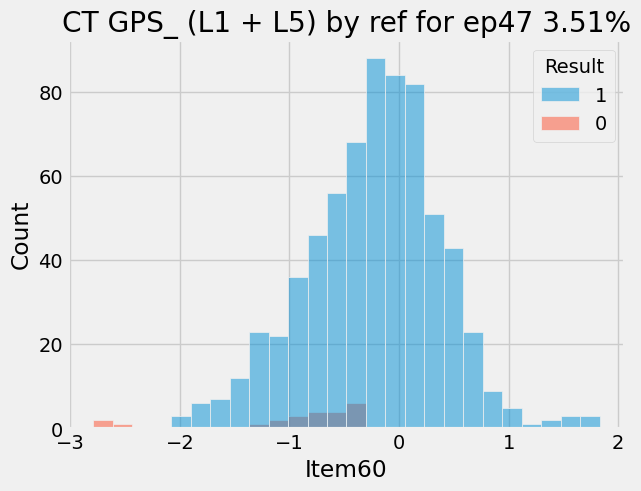

In [38]:
my_hisplot(raw,17800,60,-20,'CT GPS_ (L1 + L5) by ref for ep47 3.51%');

重測紀錄都在產測一開始(使用到之前的規格)，之後就有修正

ppk

In [36]:
ppk_df(raw,17800,60).describe()

count    673.000000
mean      -0.230684
std        0.614161
min       -1.940001
25%       -0.590001
50%       -0.199999
75%        0.180001
max        1.829999
Name: Item60, dtype: float64

In [40]:
ppk_result(ppk_df(raw,17800,60), upper=2, lower=-2)

shapiro test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
the data set is most likely not normally distributed
shapiro test indicates that the distribution is NOT normal
the data set is most likely not normally distributed


(1.0854925327278737,
 0.9602899180548232,
 (-2.5337854903840324, 2.0724184670350545))

# Others

Gyro會檢查其他站點測試紀錄?
ECG 阻抗 撕除Bezel保護貼後再測
Gen5都用黑色保護貼，會議上已確認TECO已生效